In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
data = pd.read_excel('healthcare_data.xlsx')

# Display the first few rows of the dataset
print(data.head())


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [2]:
print(data.iloc[:, :6].head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19


In [3]:
# Convert categorical columns to categorical type
data['Gender'] = data['Gender'].astype('category')

data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '60+'])

# Display the updated DataFrame
print(data.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

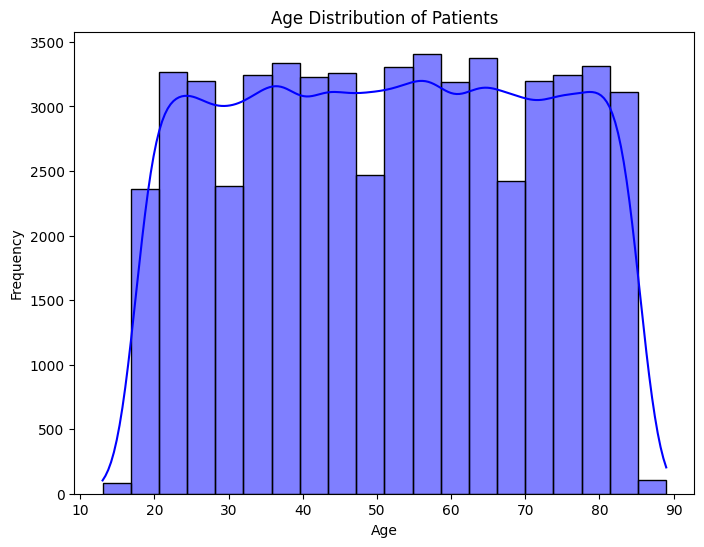

In [4]:
# Plot the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


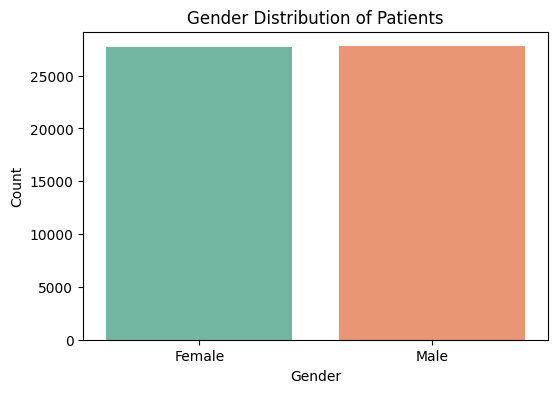

In [5]:
# Count plot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, hue='Gender', palette='Set2')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


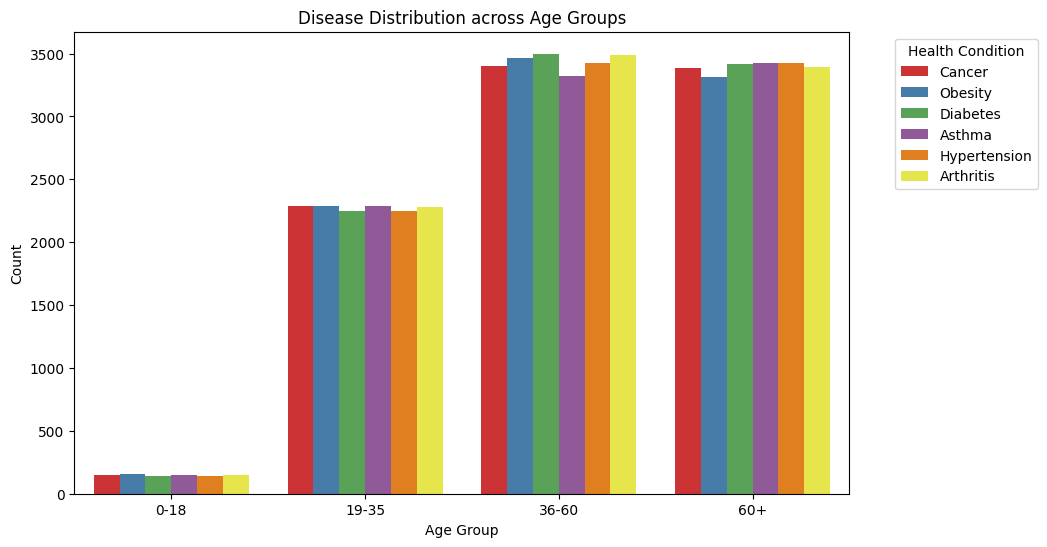

In [6]:
# Create a bar plot showing disease condition distribution across different age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Medical Condition', data=data, palette='Set1')
plt.title('Disease Distribution across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

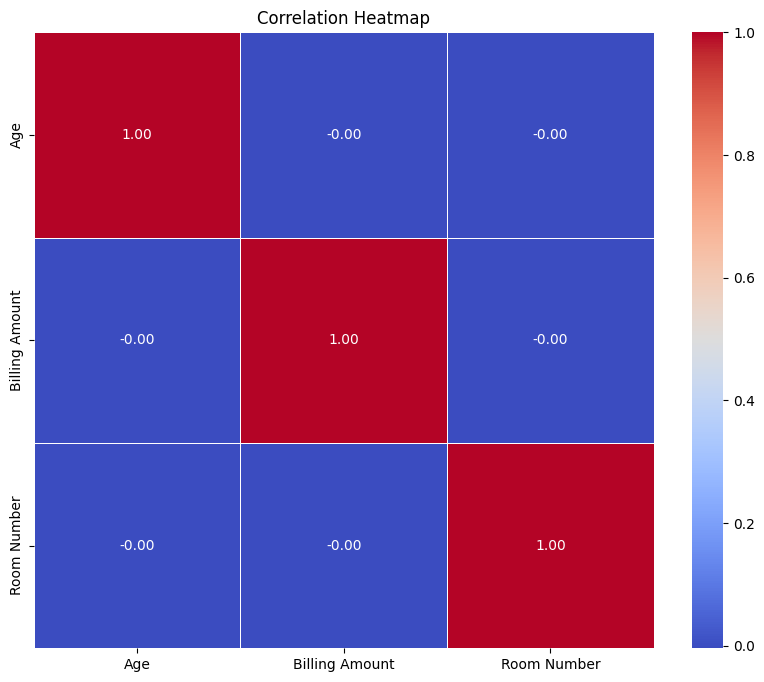

In [7]:

numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical_data
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Billing Amount'] = data['Billing Amount'].fillna(data['Billing Amount'].mean())
data['Medical Condition'] = data['Medical Condition'].fillna(data['Medical Condition'].mode()[0])

# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Medical Condition'] = data['Medical Condition'].astype('category').cat.codes  
data['Insurance Provider'] = data['Insurance Provider'].astype('category').cat.codes  

# Features and target variable for regression
# Features as x
X = data[['Age', 'Gender', 'Medical Condition', 'Insurance Provider']] 
# Target variable as y
y = data['Billing Amount'] 

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 219574330.1653043
